In [6]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/py/py_demo.xlsx')
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
               OrgId ParticipantId            DeviceId  \
0     py_demo_client          demo  2nwjevbvxzm7ehb254   
1     py_demo_client          demo  2nwjevbvxzm7ehb254   
2     py_demo_client          demo  2nwjevbvxzm7ehb254   
3     py_demo_client          demo  2nwjevbvxzm7ehb254   
4     py_demo_client          demo  2nwjevbvxzm7ehb254   
...              ...           ...                 ...   
5099  py_demo_client          demo  2nwjevbvxzm7ehb254   
5100  py_demo_client          demo  2nwjevbvxzm7ehb254   
5101  py_demo_client          demo  2nwjevbvxzm7ehb254   
5102  py_demo_client          demo  2nwjevbvxzm7ehb254   
5103  py_demo_client          demo  2nwjevbvxzm7ehb254   

                                                    url  \
0     chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...   
1     https://chromewebstore.google.com/detail/snaps... 

<ipython-input-7-bea6f378f30a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_domains.values, y=top_domains.index, palette="Blues_r")


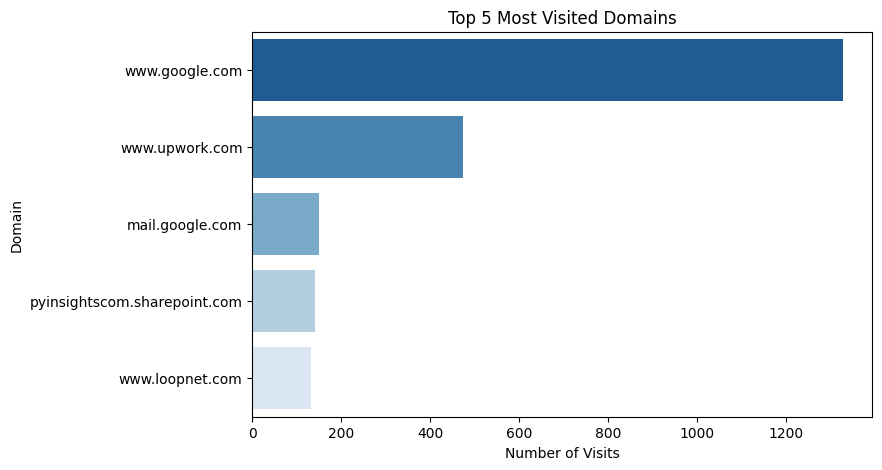

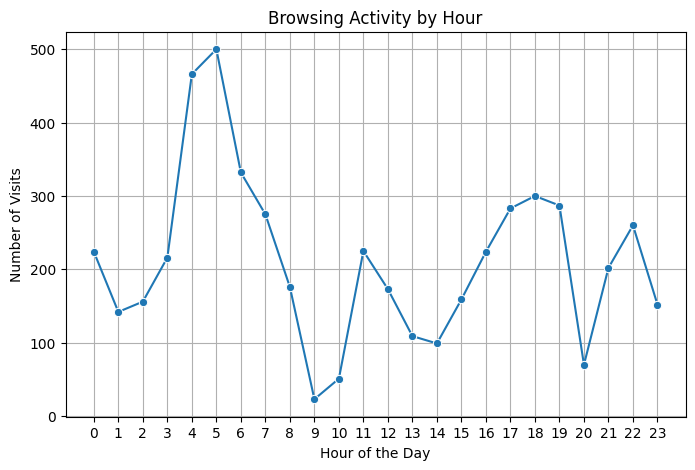

<ipython-input-7-bea6f378f30a>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transition_counts.index, y=transition_counts.values, palette="pastel")


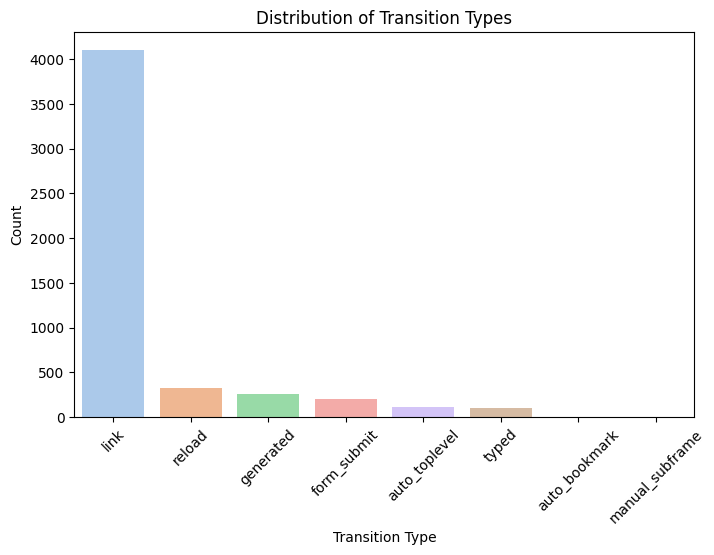

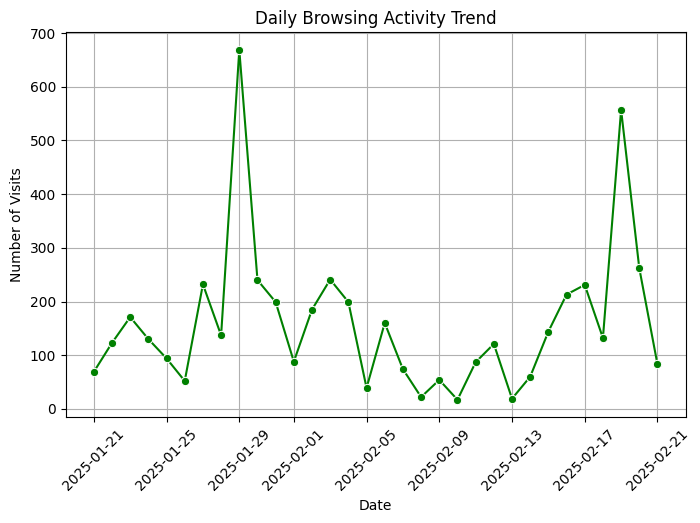

<ipython-input-7-bea6f378f30a>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette="muted")


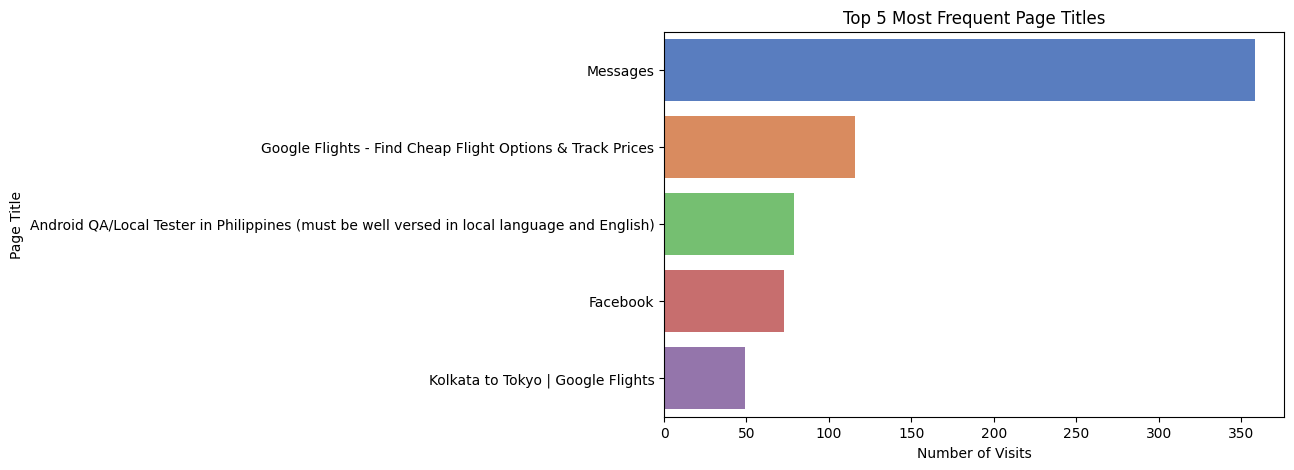

(domain
 www.google.com                  1328
 www.upwork.com                   473
 mail.google.com                  149
 pyinsightscom.sharepoint.com     140
 www.loopnet.com                  133
 Name: count, dtype: int64,
 hour
 0    224
 1    142
 2    156
 3    216
 4    466
 Name: count, dtype: int64,
 transition
 link               4098
 reload              321
 generated           259
 form_submit         204
 auto_toplevel       113
 typed               105
 auto_bookmark         3
 manual_subframe       1
 Name: count, dtype: int64,
 date
 2025-01-21     69
 2025-01-22    123
 2025-01-23    171
 2025-01-24    130
 2025-01-25     94
 dtype: int64,
 title
 Messages                                                                                      358
 Google Flights - Find Cheap Flight Options & Track Prices                                     116
 Android QA/Local Tester in Philippines (must be well versed in local language and English)     79
 Facebook                     

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert eventtimeutc to datetime for analysis
df['eventtimeutc'] = pd.to_datetime(df['eventtimeutc'])

# Extract date and hour for time-based analysis
df['date'] = df['eventtimeutc'].dt.date
df['hour'] = df['eventtimeutc'].dt.hour

# Insight 1: Most visited websites (Top domains)
df['domain'] = df['url'].apply(lambda x: x.split('/')[2] if '//' in x else x)
top_domains = df['domain'].value_counts().head(5)

# Insight 2: Peak browsing hours
peak_hours = df['hour'].value_counts().sort_index()

# Insight 3: Most common transition types (link, reload, typed, etc.)
transition_counts = df['transition'].value_counts()

# Insight 4: Daily browsing activity trend
daily_activity = df.groupby('date').size()

# Insight 5: Most frequent page titles
top_titles = df['title'].value_counts().head(5)

# Visualization 1: Top visited domains
plt.figure(figsize=(8, 5))
sns.barplot(x=top_domains.values, y=top_domains.index, palette="Blues_r")
plt.xlabel("Number of Visits")
plt.ylabel("Domain")
plt.title("Top 5 Most Visited Domains")
plt.show()

# Visualization 2: Browsing activity by hour
plt.figure(figsize=(8, 5))
sns.lineplot(x=peak_hours.index, y=peak_hours.values, marker="o")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Visits")
plt.title("Browsing Activity by Hour")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Visualization 3: Transition types distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=transition_counts.index, y=transition_counts.values, palette="pastel")
plt.xlabel("Transition Type")
plt.ylabel("Count")
plt.title("Distribution of Transition Types")
plt.xticks(rotation=45)
plt.show()

# Visualization 4: Daily browsing activity
plt.figure(figsize=(8, 5))
sns.lineplot(x=daily_activity.index, y=daily_activity.values, marker="o", color="g")
plt.xlabel("Date")
plt.ylabel("Number of Visits")
plt.title("Daily Browsing Activity Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Visualization 5: Most frequent page titles
plt.figure(figsize=(8, 5))
sns.barplot(x=top_titles.values, y=top_titles.index, palette="muted")
plt.xlabel("Number of Visits")
plt.ylabel("Page Title")
plt.title("Top 5 Most Frequent Page Titles")
plt.show()

# Return insights
top_domains, peak_hours.head(), transition_counts, daily_activity.head(), top_titles
